In [306]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import random
import matplotlib.dates as mdates

def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, wet:bool, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

        self.wet = wet # Bool for wetness check
        if wet:
            self.BackColor = "#870101"
            self.BackNeckColor = "#ad4503"
            self.ChestColor = "#756a01"
            self.LeftAbColor = "#396102"
            self.RightAbColor = "#015c0b"
            self.LeftUpArmColor = "#01663f"
            self.RightUpArmColor = "#00a191"
            self.LeftLowArmColor = "#012173"
            self.RightLowArmColor = "#1e075e"
            
        else:
            self.BackColor = "#ff0d0d"
            self.BackNeckColor = "#ff7214"
            self.ChestColor = "#d1bc02"
            self.LeftAbColor = "#6bb803"
            self.RightAbColor = "#01bf16"
            self.LeftUpArmColor = "#03c278"
            self.RightUpArmColor = "#06b4cf"
            self.LeftLowArmColor = "#0443e0"
            self.RightLowArmColor = "#4c05e6"

In [307]:
# Paul P, only wet
person6  = Person(True, "Paul P.", "#de0413", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");

# Joelle, only wet
person14 = Person(True, "Joelle", "#9e05a1", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");

# Garrett C, only wet
person28 = Person(True, "Garrett C.", "#0909eb", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");

# Dennis, only wet
person2  = Person(True, "Dennis", "#078c26", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");

# Brent, only wet
person17 = Person(True, "Brent L.", "#e8c100", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");

In [308]:
t1 = MakeDataFromText("MWTC/trevor_test_1.txt")
t2 = MakeDataFromText("MWTC/trevor_test_2.txt")
t3 = MakeDataFromText("MWTC/trevor_test_3.txt")
t4 = MakeDataFromText("MWTC/trevor_test_4.txt")
t5 = MakeDataFromText("MWTC/trevor_test_5.txt")
t6 = MakeDataFromText("MWTC/trevor_test_6.txt")
t7 = MakeDataFromText("MWTC/trevor_test_7.txt")
t8 = MakeDataFromText("MWTC/trevor_test_8.txt")
y1 = MakeDataFromText("MWTC/yoel_test_1.txt")
y2 = MakeDataFromText("MWTC/yoel_test_2.txt")
y3 = MakeDataFromText("MWTC/yoel_test_3.txt")
y4 = MakeDataFromText("MWTC/yoel_test_4.txt")

combined = dict()

for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:

    for k,v in d.items():
        if k in combined: # if tag is already in dict
            
            for i in range(len(v[0])):
                if v[0][i] in combined[k]:
                    combined[k][v[0][i]].append(v[1][i])
                else:
                    combined[k][v[0][i]] = [v[1][i]]
        
        else: # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]

for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2)

In [309]:
Back_sum1 = []; Back1_x = []
Back_sum2 = []; Back2_x = []
neck_sum1 = []; neck1_x = []
neck_sum2 = []; neck2_x = []
larm_sum1 = []; larm1_x=[];larm2_x=[]
larm_sum2 = []
rarm_sum1 = []; rarm1_x=[];rarm2_x=[]
rarm_sum2 = []
low_sum1, low_sum2, row_sum1, row_sum2 = [],[],[],[]
low1_x = []; low2_x=[]; row1_x=[]; row2_x=[]
lab_sum1 = []; lab1_x=[]; lab2_x=[]
lab_sum2 = []
rab_sum1 = []; rab1_x=[]; rab2_x=[]
chst_sum1 = []; chst1_x=[]; chst2_x=[]
rab_sum2 = []
chst_sum2 = []
b1_sum1, b1_sum2 = [],[]; b1_1_x=[]; b1_2_x=[]
b2_sum1, b2_sum2 = [],[]; b2_1_x=[]; b2_2_x=[]
b3_sum1, b3_sum2 = [],[]; b3_1_x=[]; b3_2_x=[]
bR_sum1, bR_sum2 = [],[]; bR_1_x=[]; bR_2_x=[]
bL_sum1, bL_sum2 = [],[]; bL_1_x=[]; bL_2_x=[]


p = person28
for k,v in combined.items():
    id = k[-4:]
    if id in p.TagList:
        s = sorted( v.items() )

        pre  = [i[1] for i in s if i[0]>datetime.datetime(1970, 2, 1, 8, 0, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 21, 0)]
        x1   = [i[0] for i in s if i[0]>datetime.datetime(1970, 2, 1, 8, 0, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 21, 0)]

        post = [i[1] for i in s if i[0]>datetime.datetime(1970, 2, 1, 8, 22, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 43, 0)]
        x2   = [i[0] for i in s if i[0]>datetime.datetime(1970, 2, 1, 8, 22, 0) and i[0]<datetime.datetime(1970, 2, 1, 8, 43, 0)]

        if id==p.Back:
            for j in pre:
                Back_sum1.append(j)
            for j in post:
                Back_sum2.append(j)
            for j in x1:
                Back1_x.append(j)
            for j in x2:
                Back2_x.append(j)
        
        elif id==p.BeanieR:
            for j in pre:
                bR_sum1.append(j)
            for j in post:
                bR_sum2.append(j)
            for j in x1:
                bR_1_x.append(j)
            for j in x2:
                bR_2_x.append(j)
        
        elif id==p.Leftuparm:
            for j in pre:
                larm_sum1.append(j)
            for j in post:
                larm_sum2.append(j)
            for j in x1:
                larm1_x.append(j)
            for j in x2:
                larm2_x.append(j)
        
        elif id==p.Beanie3:
            for j in pre:
                b3_sum1.append(j)
            for j in post:
                b3_sum2.append(j)
            for j in x1:
                b3_1_x.append(j)
            for j in x2:
                b3_2_x.append(j)
        
        elif id==p.Backneck:
            for j in pre:
                neck_sum1.append(j)
            for j in post:
                neck_sum2.append(j)
            for j in x1:
                neck1_x.append(j)
            for j in x2:
                neck2_x.append(j)
        
        elif id==p.Rightuparm:
            for j in pre:
                rarm_sum1.append(j)
            for j in post:
                rarm_sum2.append(j)
            for j in x1:
                rarm1_x.append(j)
            for j in x2:
                rarm2_x.append(j)
        
        elif id==p.Chest:
            for j in pre:
                chst_sum1.append(j)
            for j in post:
                chst_sum2.append(j)
            for j in x1:
                chst1_x.append(j)
            for j in x2:
                chst2_x.append(j)
        
        elif id==p.Leftab:
            for j in pre:
                lab_sum1.append(j)
            for j in post:
                lab_sum2.append(j)
            for j in x1:
                lab1_x.append(j)
            for j in x2:
                lab2_x.append(j)
        
        elif id==p.Rightab:
            for j in pre:
                rab_sum1.append(j)
            for j in post:
                rab_sum2.append(j)
            for j in x1:
                rab1_x.append(j)
            for j in x2:
                rab2_x.append(j)
        
        elif id==p.Rightlowarm:
            for j in pre:
                row_sum1.append(j)
            for j in post:
                row_sum2.append(j)
            for j in x1:
                row1_x.append(j)
            for j in x2:
                row2_x.append(j)
        
        elif id==p.Beanie2:
            for j in pre:
                b2_sum1.append(j)
            for j in post:
                b2_sum2.append(j)
            for j in x1:
                b2_1_x.append(j)
            for j in x2:
                b2_2_x.append(j)
        
        elif id==p.Leftlowarm:
            for j in pre:
                low_sum1.append(j)
            for j in post:
                low_sum2.append(j)
            for j in x1:
                low1_x.append(j)
            for j in x2:
                low2_x.append(j)
        
        elif id==p.Beanie1:
            for j in pre:
                b1_sum1.append(j)
            for j in post:
                b1_sum2.append(j)
            for j in x1:
                b1_1_x.append(j)
            for j in x2:
                b1_2_x.append(j)
        
        elif id==p.BeanieL:
            for j in pre:
                bL_sum1.append(j)
            for j in post:
                bL_sum2.append(j)
            for j in x1:
                bL_1_x.append(j)
            for j in x2:
                bL_2_x.append(j)

In [310]:
# Back
Back1_xs = np.array([d.timestamp() for d in Back1_x])[::, None]
Back_sum1 = np.array(Back_sum1)[::, None]
Back2_xs = np.array([d.timestamp() for d in Back2_x])[::, None]
Back_sum2 = np.array(Back_sum2)[::, None]

# Back Neck
neck1_xs = np.array([d.timestamp() for d in neck1_x])[::, None]
neck_sum1 = np.array(neck_sum1)[::, None]
neck2_xs = np.array([d.timestamp() for d in neck2_x])[::, None]
neck_sum2 = np.array(neck_sum2)[::, None]

# Chest
chst1_xs = np.array([d.timestamp() for d in chst1_x])[::, None]
chst_sum1 = np.array(chst_sum1)[::, None]
chst2_xs = np.array([d.timestamp() for d in chst2_x])[::, None]
chst_sum2 = np.array(chst_sum2)[::, None]

# Beanie L
bL_1_xs = np.array([d.timestamp() for d in bL_1_x])[::, None]
bL_sum1 = np.array(bL_sum1)[::, None]
bL_2_xs = np.array([d.timestamp() for d in bL_2_x])[::, None]
bL_sum2 = np.array(bL_sum2)[::, None]

# Beanie R
bR_1_xs = np.array([d.timestamp() for d in bR_1_x])[::, None]
bR_sum1 = np.array(bR_sum1)[::, None]
bR_2_xs = np.array([d.timestamp() for d in bR_2_x])[::, None]
bR_sum2 = np.array(bR_sum2)[::, None]

# Beanie 1
b1_1_xs = np.array([d.timestamp() for d in b1_1_x])[::, None]
b1_sum1 = np.array(b1_sum1)[::, None]
b1_2_xs = np.array([d.timestamp() for d in b1_2_x])[::, None]
b1_sum2 = np.array(b1_sum2)[::, None]

# Beanie 2
b2_1_xs = np.array([d.timestamp() for d in b2_1_x])[::, None]
b2_sum1 = np.array(b2_sum1)[::, None]
b2_2_xs = np.array([d.timestamp() for d in b2_2_x])[::, None]
b2_sum2 = np.array(b2_sum2)[::, None]

# Beanie 3
b3_1_xs = np.array([d.timestamp() for d in b3_1_x])[::, None]
b3_sum1 = np.array(b3_sum1)[::, None]
b3_2_xs = np.array([d.timestamp() for d in b3_2_x])[::, None]
b3_sum2 = np.array(b3_sum2)[::, None]

# Left Upper Arm
larm1_xs = np.array([d.timestamp() for d in larm1_x])[::, None]
larm_sum1 = np.array(larm_sum1)[::, None]
larm2_xs = np.array([d.timestamp() for d in larm2_x])[::, None]
larm_sum2 = np.array(larm_sum2)[::, None]

# Right Upper Arm
rarm1_xs = np.array([d.timestamp() for d in rarm1_x])[::, None]
rarm_sum1 = np.array(rarm_sum1)[::, None]
rarm2_xs = np.array([d.timestamp() for d in rarm2_x])[::, None]
rarm_sum2 = np.array(rarm_sum2)[::, None]

# Left Lower Arm
low1_xs = np.array([d.timestamp() for d in low1_x])[::, None]
low_sum1 = np.array(low_sum1)[::, None]
low2_xs = np.array([d.timestamp() for d in low2_x])[::, None]
low_sum2 = np.array(low_sum2)[::, None]

# Right Lower Arm
row1_xs = np.array([d.timestamp() for d in row1_x])[::, None]
row_sum1 = np.array(row_sum1)[::, None]
row2_xs = np.array([d.timestamp() for d in row2_x])[::, None]
row_sum2 = np.array(row_sum2)[::, None]

# Left Abdomen
lab1_xs = np.array([d.timestamp() for d in lab1_x])[::, None]
lab_sum1 = np.array(lab_sum1)[::, None]
lab2_xs = np.array([d.timestamp() for d in lab2_x])[::, None]
lab_sum2 = np.array(lab_sum2)[::, None]

# Right Abdomen
rab1_xs = np.array([d.timestamp() for d in rab1_x])[::, None]
rab_sum1 = np.array(rab_sum1)[::, None]
rab2_xs = np.array([d.timestamp() for d in rab2_x])[::, None]
rab_sum2 = np.array(rab_sum2)[::, None]

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Back
lf_back1 = LinearRegression().fit(Back1_xs, Back_sum1)
lf_back2 = LinearRegression().fit(Back2_xs, Back_sum2)

# Neck
lf_neck1 = LinearRegression().fit(neck1_xs, neck_sum1)
lf_neck2 = LinearRegression().fit(neck2_xs, neck_sum2)

# Chest
lf_chst1 = LinearRegression().fit(chst1_xs, chst_sum1)
lf_chst2 = LinearRegression().fit(chst2_xs, chst_sum2)

# Beanie L
lf_bL_1 = LinearRegression().fit(bL_1_xs, bL_sum1)
lf_bL_2 = LinearRegression().fit(bL_2_xs, bL_sum2)

# Beanie R
lf_bR_1 = LinearRegression().fit(bR_1_xs, bR_sum1)
# lf_bR_2 = LinearRegression().fit(bR_2_xs, bR_sum2)

# Beanie 1
lf_b1_1 = LinearRegression().fit(b1_1_xs, b1_sum1)
lf_b1_2 = LinearRegression().fit(b1_2_xs, b1_sum2)

# Beanie 2
lf_b2_1 = LinearRegression().fit(b2_1_xs, b2_sum1)
lf_b2_2 = LinearRegression().fit(b2_2_xs, b2_sum2)

# Beanie 3
lf_b3_1 = LinearRegression().fit(b3_1_xs, b3_sum1)
lf_b3_2 = LinearRegression().fit(b3_2_xs, b3_sum2)

# Left Upper Arm
lf_larm1 = LinearRegression().fit(larm1_xs, larm_sum1)
lf_larm2 = LinearRegression().fit(larm2_xs, larm_sum2)

# Right Upper Arm
lf_rarm1 = LinearRegression().fit(rarm1_xs, rarm_sum1)
lf_rarm2 = LinearRegression().fit(rarm2_xs, rarm_sum2)

# Left Lower Arm
lf_low1 = LinearRegression().fit(low1_xs, low_sum1)
lf_low2 = LinearRegression().fit(low2_xs, low_sum2)

# Right Lower Arm
lf_row1 = LinearRegression().fit(row1_xs, row_sum1)
lf_row2 = LinearRegression().fit(row2_xs, row_sum2)

# Left Abdomen
lf_lab1 = LinearRegression().fit(lab1_xs, lab_sum1)
lf_lab2 = LinearRegression().fit(lab2_xs, lab_sum2)

# Right Abdomen
lf_rab1 = LinearRegression().fit(rab1_xs, rab_sum1)
lf_rab2 = LinearRegression().fit(rab2_xs, rab_sum2)

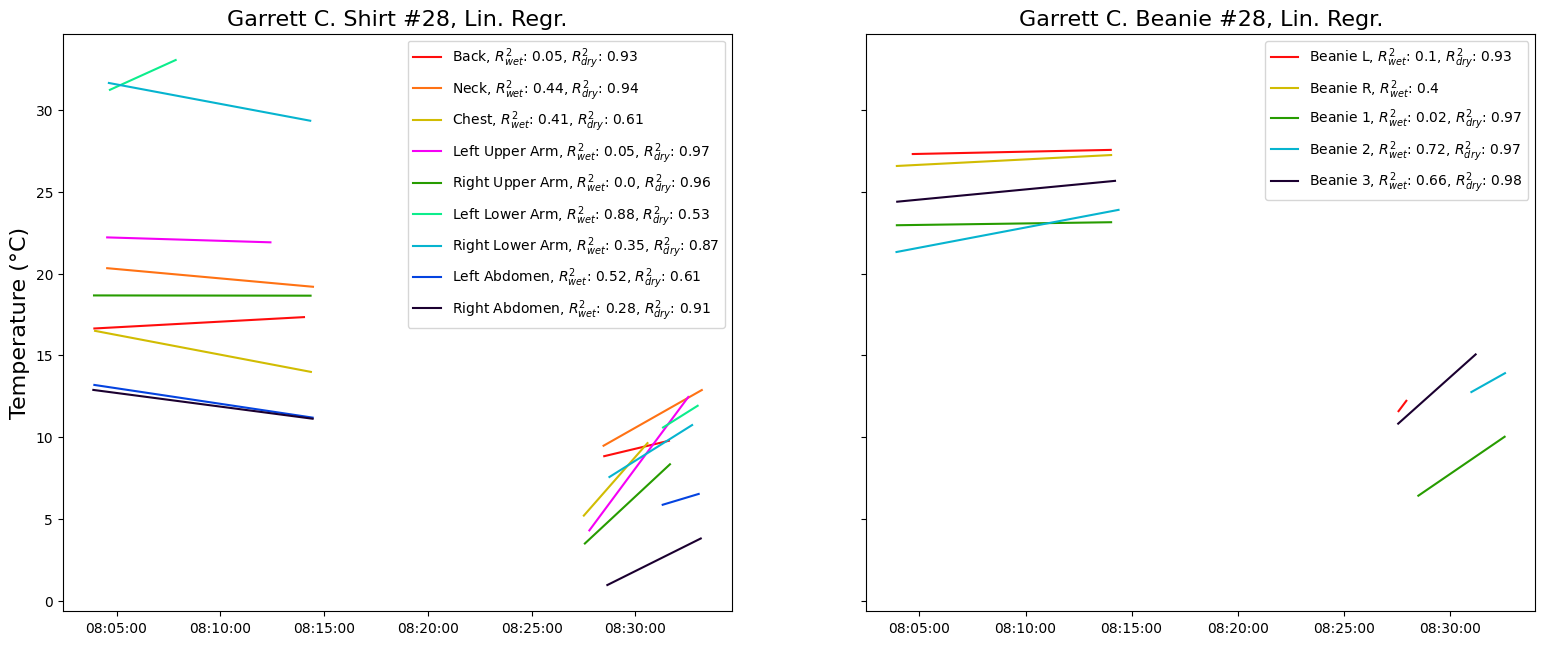

In [312]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 7.5), sharey=True)
myFmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax1.set_title("Garrett C. Shirt #28, Lin. Regr.", fontsize=16)
ax2.set_title("Garrett C. Beanie #28, Lin. Regr.",fontsize=16)
ax1.set_ylabel("Temperature (°C)", fontsize=16)

c1 = [
    "#ff0d0d",
    "#ff7214",
    "#d1bc02",
    "#f500f5",
    "#279c00",
    "#0ced8c",
    "#06b4cf",
    "#0443e0",
    "#1b0030",
]

ax1.plot(Back1_x, lf_back1.predict(Back1_xs), color=c1[0], label="Back, " + r"$R^2_{wet}$: "+str(round(r2_score(Back_sum1, lf_back1.predict(Back1_xs)),2)) + ", " + r"$R^2_{dry}$: "+str(round(r2_score(Back_sum2, lf_back2.predict(Back2_xs)),2)))
ax1.plot(Back2_x, lf_back2.predict(Back2_xs), color=c1[0])
ax1.plot(neck1_x, lf_neck1.predict(neck1_xs), color=c1[1], label="Neck, " + r"$R^2_{wet}$: "+str(round(r2_score(neck_sum1, lf_neck1.predict(neck1_xs)),2)) + ", " + r"$R^2_{dry}$: "+str(round(r2_score(neck_sum2, lf_neck2.predict(neck2_xs)),2)))
ax1.plot(neck2_x, lf_neck2.predict(neck2_xs), color=c1[1])
ax1.plot(chst1_x, lf_chst1.predict(chst1_xs), color=c1[2], label="Chest, " + r"$R^2_{wet}$: "+str(round(r2_score(chst_sum1, lf_chst1.predict(chst1_xs)),2))+ ", "+ r"$R^2_{dry}$: "+str(round(r2_score(chst_sum2, lf_chst2.predict(chst2_xs)),2)))
ax1.plot(chst2_x, lf_chst2.predict(chst2_xs), color=c1[2])
ax1.plot(larm1_x, lf_larm1.predict(larm1_xs), color=c1[3], label="Left Upper Arm, " + r"$R^2_{wet}$: "+str(round(r2_score(larm_sum1, lf_larm1.predict(larm1_xs)),2))+", "+ r"$R^2_{dry}$: "+str(round(r2_score(larm_sum2, lf_larm2.predict(larm2_xs)),2)))
ax1.plot(larm2_x, lf_larm2.predict(larm2_xs), color=c1[3])
ax1.plot(rarm1_x, lf_rarm1.predict(rarm1_xs), color=c1[4], label="Right Upper Arm, "+r"$R^2_{wet}$: "+ str(round(r2_score(rarm_sum1, lf_rarm1.predict(rarm1_xs)),2))+", "+r"$R^2_{dry}$: "+ str(round(r2_score(rarm_sum2, lf_rarm2.predict(rarm2_xs)),2)))
ax1.plot(rarm2_x, lf_rarm2.predict(rarm2_xs), color=c1[4])
ax1.plot(low1_x, lf_low1.predict(low1_xs), color=c1[5], label="Left Lower Arm, " +r"$R^2_{wet}$: "+ str(round(r2_score(low_sum1, lf_low1.predict(low1_xs)),2))+", " +r"$R^2_{dry}$: "+ str(round(r2_score(low_sum2, lf_low2.predict(low2_xs)),2)))
ax1.plot(low2_x, lf_low2.predict(low2_xs), color=c1[5])
ax1.plot(row1_x, lf_row1.predict(row1_xs), color=c1[6], label="Right Lower Arm, "+r"$R^2_{wet}$: "+ str(round(r2_score(row_sum1, lf_row1.predict(row1_xs)),2)) + ", " +r"$R^2_{dry}$: "+ str(round(r2_score(row_sum2, lf_row2.predict(row2_xs)),2)))
ax1.plot(row2_x, lf_row2.predict(row2_xs), color=c1[6])
ax1.plot(lab1_x, lf_lab1.predict(lab1_xs), color=c1[7], label="Left Abdomen, "+r"$R^2_{wet}$: "+ str(round(r2_score(lab_sum1, lf_lab1.predict(lab1_xs)),2))+", " +r"$R^2_{dry}$: "+ str(round(r2_score(lab_sum2, lf_lab2.predict(lab2_xs)),2)))
ax1.plot(lab2_x, lf_lab2.predict(lab2_xs), color=c1[7])
ax1.plot(rab1_x, lf_rab1.predict(rab1_xs), color=c1[8], label="Right Abdomen, "+r"$R^2_{wet}$: "+ str(round(r2_score(rab_sum1, lf_rab1.predict(rab1_xs)),2))+", "+r"$R^2_{dry}$: "+ str(round(r2_score(rab_sum2, lf_rab2.predict(rab2_xs)),2)))
ax1.plot(rab2_x, lf_rab2.predict(rab2_xs), color=c1[8])

ax2.plot(bL_1_x, lf_bL_1.predict(bL_1_xs), color=c1[0], label="Beanie L, "+ r"$R^2_{wet}$: "+ str(round(r2_score(bL_sum1, lf_bL_1.predict(bL_1_xs)),2)) + ", "+r"$R^2_{dry}$: "+ str(round(r2_score(bL_sum2, lf_bL_2.predict(bL_2_xs)),2)))
ax2.plot(bL_2_x, lf_bL_2.predict(bL_2_xs), color=c1[0])
ax2.plot(bR_1_x, lf_bR_1.predict(bR_1_xs), color=c1[2], label="Beanie R, "+ r"$R^2_{wet}$: "+str(round(r2_score(bR_sum1, lf_bR_1.predict(bR_1_xs)),2))+ ", "+r"$R^2_{dry}$: "+ str(round(r2_score(bR_sum2, lf_bR_2.predict(bR_2_xs)),2)))
ax2.plot(bR_2_x, lf_bR_2.predict(bR_2_xs), color=c1[2])
ax2.plot(b1_1_x, lf_b1_1.predict(b1_1_xs), color=c1[4], label="Beanie 1, "+ r"$R^2_{wet}$: "+str(round(r2_score(b1_sum1, lf_b1_1.predict(b1_1_xs)),2))+", "+r"$R^2_{dry}$: "+ str(round(r2_score(b1_sum2, lf_b1_2.predict(b1_2_xs)),2)))
ax2.plot(b1_2_x, lf_b1_2.predict(b1_2_xs), color=c1[4])
ax2.plot(b2_1_x, lf_b2_1.predict(b2_1_xs), color=c1[6], label="Beanie 2, "+ r"$R^2_{wet}$: "+str(round(r2_score(b2_sum1, lf_b2_1.predict(b2_1_xs)),2)) + ", " +r"$R^2_{dry}$: "+ str(round(r2_score(b2_sum2, lf_b2_2.predict(b2_2_xs)),2)))
ax2.plot(b2_2_x, lf_b2_2.predict(b2_2_xs), color=c1[6])
ax2.plot(b3_1_x, lf_b3_1.predict(b3_1_xs), color=c1[8], label="Beanie 3, " + r"$R^2_{wet}$: "+str(round(r2_score(b3_sum1, lf_b3_1.predict(b3_1_xs)),2)) + ", " + r"$R^2_{dry}$: "+str(round(r2_score(b3_sum2, lf_b3_2.predict(b3_2_xs)),2)))
ax2.plot(b3_2_x, lf_b3_2.predict(b3_2_xs), color=c1[8])


ax1.legend(loc="upper right")
ax2.legend()